# Improved BNN visualization

In [5]:
import torch
import torch.nn as nn
from tqdm import tqdm
import matplotlib.pyplot as plt

from src.data.data_loader import load_mauna_loa_atmospheric_co2, load_international_airline_passengers
from sklearn.model_selection import train_test_split

from src.models.improved_bnn import BayesianModel

def train_bnn_model(model, x_train_tensor, y_train_tensor, num_epochs=1000, lr=0.01):
    """
    Train a Bayesian Neural Network model.

    Parameters:
    - model (BayesianModel): The Bayesian Neural Network model to be trained.
    - X_train_tensor (torch.Tensor): The input training data tensor.
    - y_train_tensor (torch.Tensor): The target training data tensor.
    - num_epochs (int): The number of training epochs (default is 1000).
    - lr (float): The learning rate for the optimizer (default is 0.01).

    Returns:
    List[float]: A list of training losses for each epoch.
    """
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    loss_function = nn.MSELoss()
    train_losses = []

    with tqdm(total=num_epochs, desc="Training", unit="epoch") as pbar:
        for epoch in range(num_epochs):
            # Forward pass
            outputs = model(x_train_tensor)
            loss = loss_function(outputs, y_train_tensor)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_losses.append(loss.item())
            pbar.set_postfix({"Loss": loss.item()})
            pbar.update()

    return train_losses


def plot_results(x_test, y_test, predictions, label):
    """
    Plot the ground truth and predictions against input features.

    Parameters:
    - x_test (array-like): Input features for testing.
    - y_test (array-like): Ground truth values.
    - predictions (array-like): Predicted values.
    - label (str): Label for the plot.

    Returns:
    None
    """
    plt.figure(figsize=(10, 6))
    plt.plot(x_test, y_test, "b.", markersize=10, label="Ground Truth")
    plt.plot(x_test, predictions, "r.", markersize=10, label="Predictions")
    plt.xlabel("Input Features (X_test)")
    plt.ylabel("Ground Truth and Predictions (y_test, Predictions)")
    plt.title(f"True Values vs Predictions ({label})")
    plt.legend()
    plt.show()

MUANA_DATA_PATH = "../data/mauna_loa_atmospheric_co2.csv"
AIRLINE_DATA_PATH = "../data/international-airline-passengers.csv"

 <h2>mauna_loa_atmospheric_co2 Dataset

Training:   2%|▎         | 25/1000 [00:00<00:11, 82.77epoch/s, Loss=1.06e+5]

Training: 100%|██████████| 1000/1000 [00:07<00:00, 130.71epoch/s, Loss=6.12]  


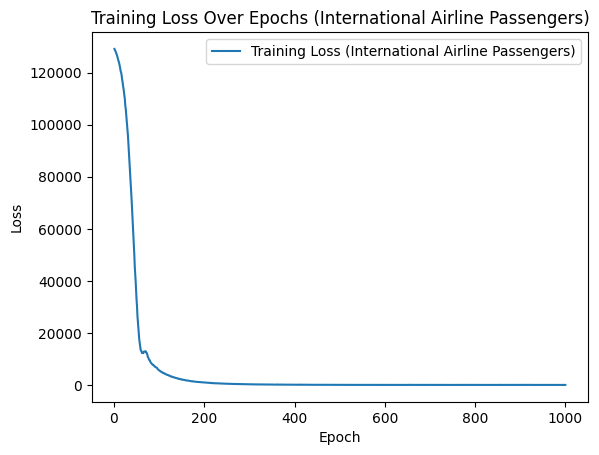

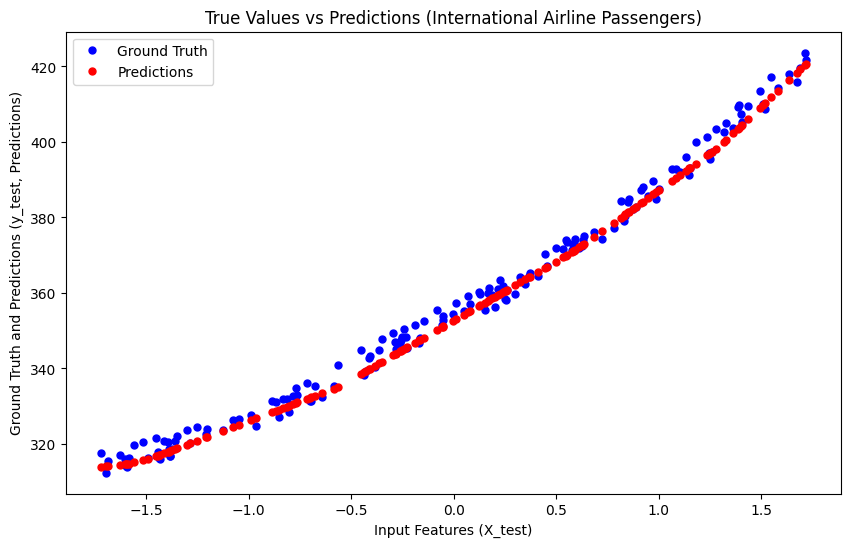

In [6]:
# Prepare data
X1, y1, X1_normalized = load_mauna_loa_atmospheric_co2(MUANA_DATA_PATH)

# Split the data into training and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1_normalized, y1, test_size=0.2, random_state=42
)

# Convert NumPy arrays to PyTorch tensors
X1_train_tensor = torch.from_numpy(X1_train).float()
y1_train_tensor = torch.from_numpy(y1_train).float()
X1_test_tensor = torch.from_numpy(X1_test).float()

# Define the Bayesian neural network model
input_size = X1_train.shape[1]
HIDDEN_SIZE1 = 20
HIDDEN_SIZE2 = 40
OUTPUT_SIZE = 1
model_mauna = BayesianModel(input_size, HIDDEN_SIZE1, HIDDEN_SIZE2, OUTPUT_SIZE)


# Training loop
epochs = 1000
train_losses_mauna = train_bnn_model(model_mauna, X1_train_tensor, y1_train_tensor)

# Plot training losses
plt.plot(range(1, epochs + 1), train_losses_mauna,
        label="Training Loss (International Airline Passengers)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs (International Airline Passengers)")
plt.legend()
plt.show()

# Evaluate the model on the test set
with torch.no_grad():
    model_mauna.eval()
    predictions_mauna = model_mauna(X1_test_tensor)

# Convert predictions to NumPy array for plotting
predictions_np_mauna = predictions_mauna.numpy()

# Plot Ground Truth vs Predictions
plot_results(X1_test, y1_test, predictions_np_mauna, "International Airline Passengers")

# export model
torch.save(model_mauna, "../models/mauna_loa_model_improved.pth")


<h2>international-airline-passengers dataset

Training:   0%|          | 4/1000 [00:00<00:20, 49.22epoch/s, Loss=9.5e+4] 

Training: 100%|██████████| 1000/1000 [00:06<00:00, 160.59epoch/s, Loss=2.04e+3]


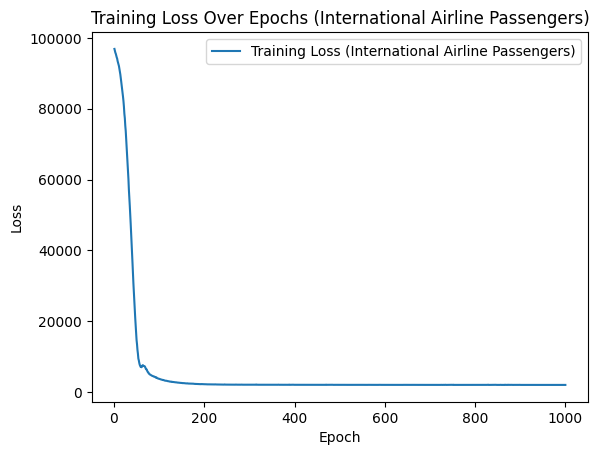

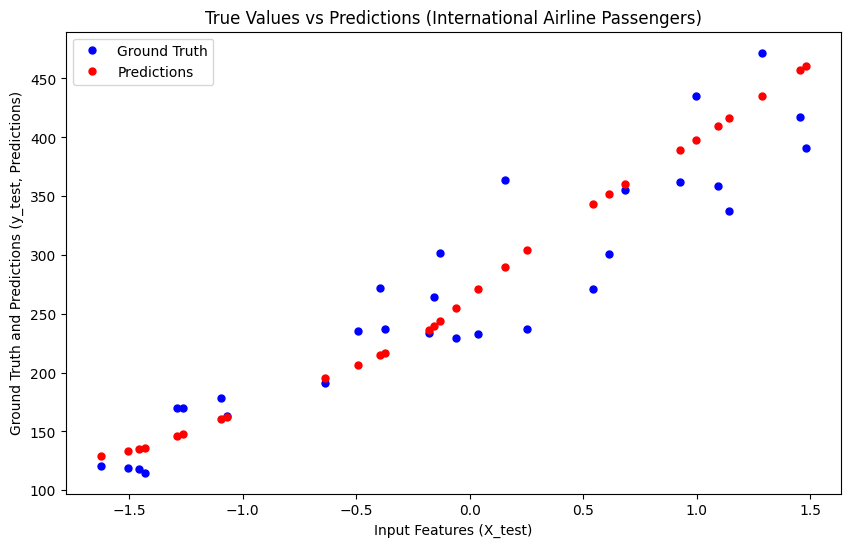

In [7]:
# Prepare data
X1, y1, X1_normalized = load_international_airline_passengers(AIRLINE_DATA_PATH)

# Split the data into training and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1_normalized, y1, test_size=0.2, random_state=42
)

# Convert NumPy arrays to PyTorch tensors
X1_train_tensor = torch.from_numpy(X1_train).float()
y1_train_tensor = torch.from_numpy(y1_train).float()
X1_test_tensor = torch.from_numpy(X1_test).float()

# Define the Bayesian neural network model
input_size = X1_train.shape[1]
HIDDEN_SIZE1 = 40
HIDDEN_SIZE2 = 40
OUTPUT_SIZE = 1
model_airline = BayesianModel(input_size, HIDDEN_SIZE1, HIDDEN_SIZE2, OUTPUT_SIZE)

# Training loop
train_losses_airline = train_bnn_model(model_airline, X1_train_tensor, y1_train_tensor)

# Plot training losses
plt.plot(range(1, epochs + 1), train_losses_airline,
        label="Training Loss (International Airline Passengers)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs (International Airline Passengers)")
plt.legend()
plt.show()

# Evaluate the model on the test set
with torch.no_grad():
    model_airline.eval()
    predictions_airline = model_airline(X1_test_tensor)

# Convert predictions to NumPy array for plotting
predictions_np_airline = predictions_airline.numpy()

# Plot Ground Truth vs Predictions
plot_results(X1_test, y1_test, predictions_np_airline, "International Airline Passengers")

# export model
torch.save(model_airline, "../models/international_airline_passengers_improved.pth")